In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Analyze of MIMIC-III data to analyze the Cardio-Vascular Disease (CVD)

In [50]:
# Loading the data
cvd_dataset = pd.read_csv("Datasets\Raw\CVD_Vital_SIgns.csv")
cvd_dataset.head()

,subject_id,icustay_id,heart_rate,blood_pressure,oxygen_saturation,respiratory_rate,temperature,Label
0,94297,200697.0,93.0,94.0,98.0,39.0,36.0,1
1,94229,219381.0,97.0,96.0,98.0,16.0,36.5,0
2,94195,276193.0,82.0,96.0,97.0,25.0,36.3,1
3,94256,241577.0,98.0,196.0,96.0,16.0,36.5,1
4,93996,236789.0,98.0,92.0,99.0,28.0,37.2,1


In [51]:
cvd_dataset.columns

Index(['subject_id', 'icustay_id', 'heart_rate', 'blood_pressure',
       'oxygen_saturation', 'respiratory_rate', 'temperature', 'Label'],
      dtype='object')

In [52]:
cvd_dataset.drop(['subject_id','icustay_id'],axis=1,inplace=True)

In [53]:
cvd_dataset

,heart_rate,blood_pressure,oxygen_saturation,respiratory_rate,temperature,Label
0,93.0,94.0,98.0,39.0,36.0,1
1,97.0,96.0,98.0,16.0,36.5,0
2,82.0,96.0,97.0,25.0,36.3,1
3,98.0,196.0,96.0,16.0,36.5,1
4,98.0,92.0,99.0,28.0,37.2,1
...,...,...,...,...,...,...
23463,98.0,117.0,97.0,34.0,37.5,1
23464,70.0,93.0,96.0,25.0,37.2,1
23465,86.0,91.0,97.0,27.0,36.9,1
23466,76.0,85.0,99.0,20.0,36.2,1


## Basic Information

In [54]:
cvd_dataset['Label'].value_counts()

Label
1    17534
0     5934
Name: count, dtype: int64

In [55]:
cvd_dataset.isna().sum()

heart_rate           0
blood_pressure       0
oxygen_saturation    0
respiratory_rate     0
temperature          0
Label                0
dtype: int64

In [56]:
cvd_dataset.duplicated().sum()

916

In [57]:
# Removing the duplicates of the dataset
cvd_dataset.drop_duplicates(inplace=True)

In [58]:
cvd_dataset['Label'].value_counts()

Label
1    17288
0     5264
Name: count, dtype: int64

In [59]:
print("\nSummary Statistics:\n", cvd_dataset.describe())



Summary Statistics:
          heart_rate  blood_pressure  oxygen_saturation  respiratory_rate  \
count  2.255200e+04    22552.000000       22552.000000      22552.000000   
mean   5.359859e+02      104.729248          97.345482         24.950381   
std    6.658914e+04       21.340651          64.163173         11.366072   
min    7.000000e+00      -11.000000           9.000000          2.000000   
25%    9.000000e+01       93.000000          96.000000         16.000000   
50%    9.400000e+01       98.000000          97.000000         25.000000   
75%    9.700000e+01      110.000000          98.000000         30.000000   
max    9.999999e+06      290.000000        9560.000000        914.000000   

        temperature         Label  
count  22552.000000  22552.000000  
mean      37.930721      0.766584  
std        7.043292      0.423014  
min       -3.000000      0.000000  
25%       36.800000      1.000000  
50%       37.200000      1.000000  
75%       37.800000      1.000000  
max  

## Data Vizualization

### Data Histograms

Text(0.5, 1.0, 'Oxygen Saturation Distribution')

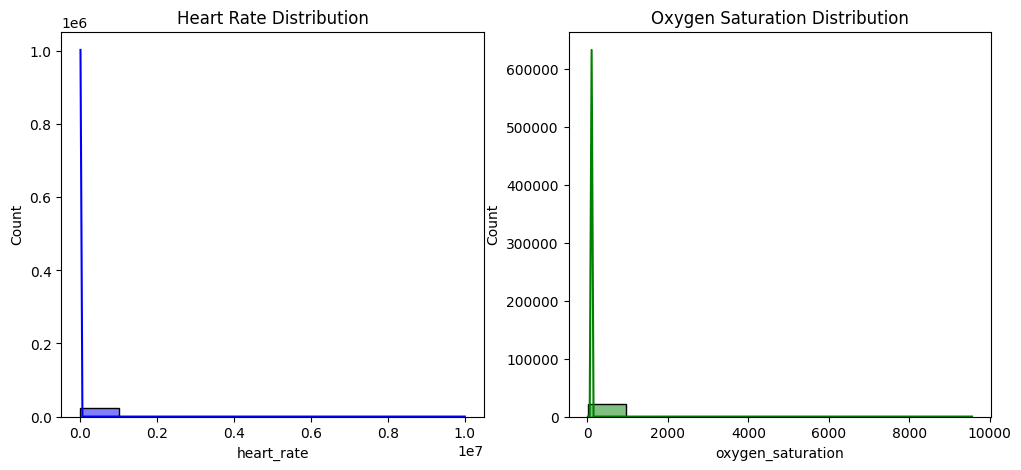

In [60]:
# Visualizing Distributions
plt.figure(figsize=(12, 5))

# Histogram for Vizualize data
plt.subplot(1, 2, 1)
sns.histplot(cvd_dataset["heart_rate"], bins=10, kde=True, color='blue')
plt.title("Heart Rate Distribution")

plt.subplot(1, 2, 2)
sns.histplot(cvd_dataset["oxygen_saturation"], bins=10, kde=True, color='green')
plt.title("Oxygen Saturation Distribution")

##### As you can see as the boxplot distribution there is a huge amount of outliers in this dataset.

### Detecting Outliers

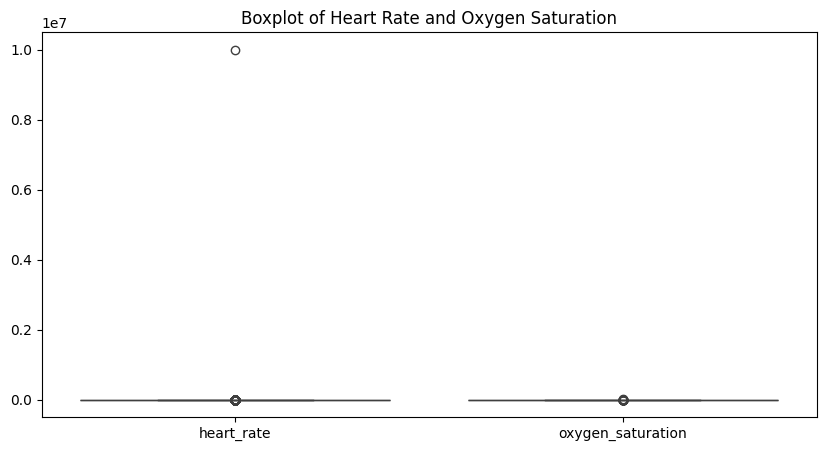

In [61]:
# Boxplots to detect outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=cvd_dataset[['heart_rate', 'oxygen_saturation']])
plt.title("Boxplot of Heart Rate and Oxygen Saturation")
plt.show()

### Removing the Outliers

In [62]:
# Inter-quantile range calculation for each feature
Q1_heart_rate = cvd_dataset['heart_rate'].quantile(0.25)
Q3_heart_rate = cvd_dataset['heart_rate'].quantile(0.75)
IQR_heart_rate = Q3_heart_rate - Q1_heart_rate

Q1_oxygen_saturation = cvd_dataset['oxygen_saturation'].quantile(0.25)
Q3_oxygen_saturation = cvd_dataset['oxygen_saturation'].quantile(0.75)
IQR_oxygen_saturation = Q3_oxygen_saturation - Q1_oxygen_saturation

# Determine the bounds for outliers
lower_bound_heart_rate = Q1_heart_rate - 1.5 * IQR_heart_rate
upper_bound_heart_rate = Q3_heart_rate + 1.5 * IQR_heart_rate

lower_bound_oxygen_saturation = Q1_oxygen_saturation - 1.5 * IQR_oxygen_saturation
upper_bound_oxygen_saturation = Q3_oxygen_saturation + 1.5 * IQR_oxygen_saturation

# Filter out rows with outliers
cvd_dataset = cvd_dataset[
    (cvd_dataset['heart_rate'] >= lower_bound_heart_rate) &
    (cvd_dataset['heart_rate'] <= upper_bound_heart_rate) &
    (cvd_dataset['oxygen_saturation'] >= lower_bound_oxygen_saturation) &
    (cvd_dataset['oxygen_saturation'] <= upper_bound_oxygen_saturation)
]


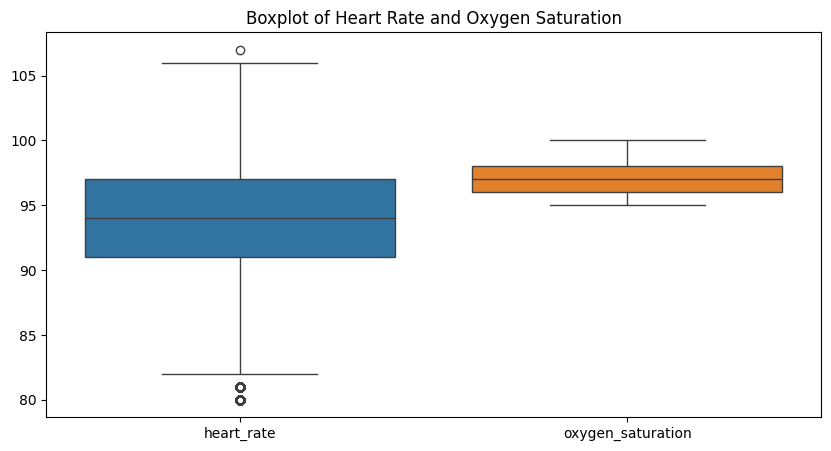

In [63]:
# Boxplots to detect outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=cvd_dataset[['heart_rate', 'oxygen_saturation']])
plt.title("Boxplot of Heart Rate and Oxygen Saturation")
plt.show()

Text(0.5, 1.0, 'Oxygen Saturation Distribution')

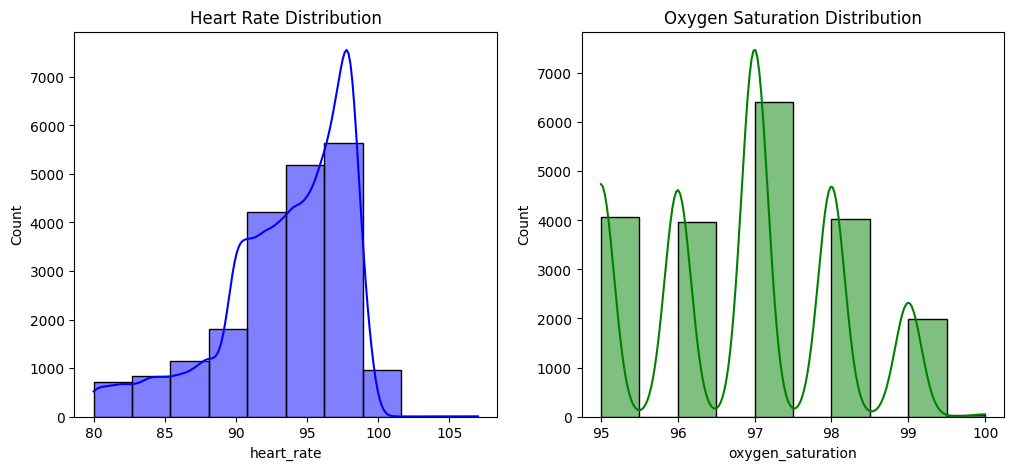

In [64]:
# Visualizing Distributions
plt.figure(figsize=(12, 5))

# Histogram for Vizualize data
plt.subplot(1, 2, 1)
sns.histplot(cvd_dataset["heart_rate"], bins=10, kde=True, color='blue')
plt.title("Heart Rate Distribution")

plt.subplot(1, 2, 2)
sns.histplot(cvd_dataset["oxygen_saturation"], bins=10, kde=True, color='green')
plt.title("Oxygen Saturation Distribution")

### Correlation Matrix

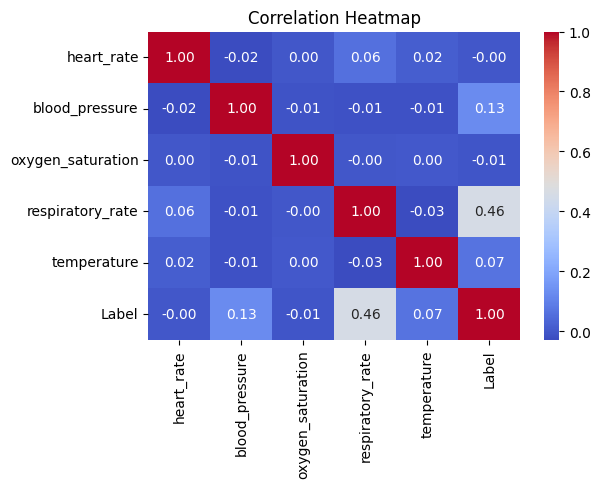

In [36]:
# Correlation Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cvd_dataset.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### Pair Plot

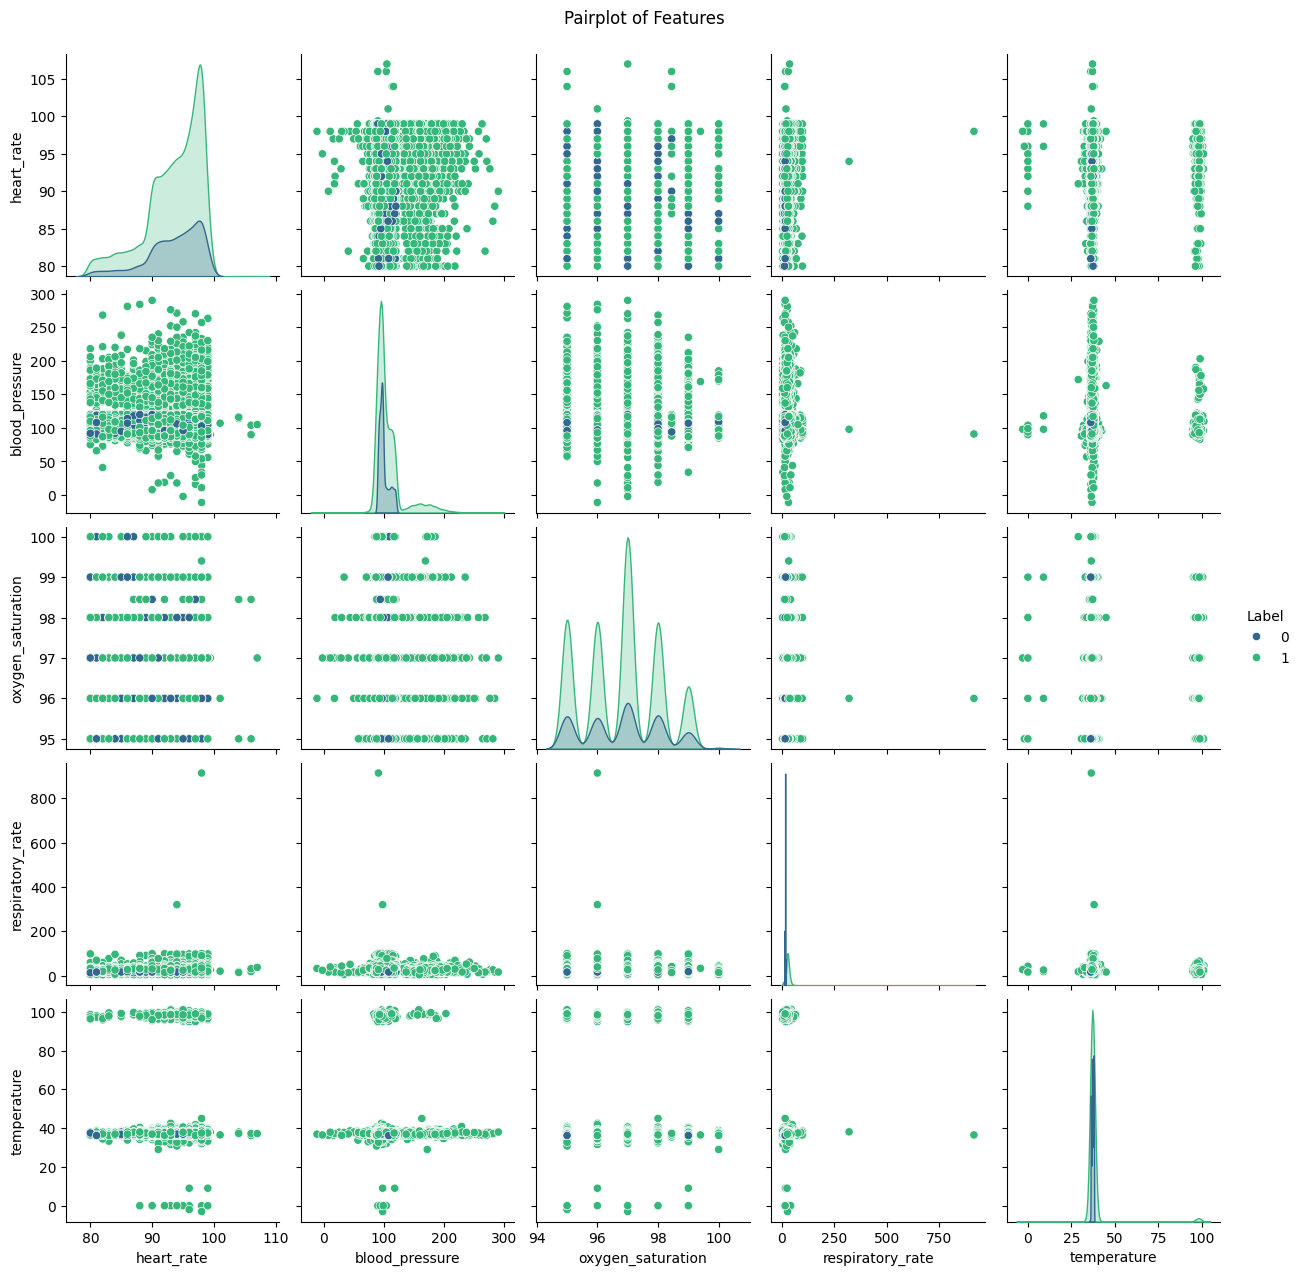

In [65]:
# Pairplot (good for visualizing relationships between features)
sns.pairplot(cvd_dataset, hue='Label', palette='viridis')
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()


### Histograms for the Features

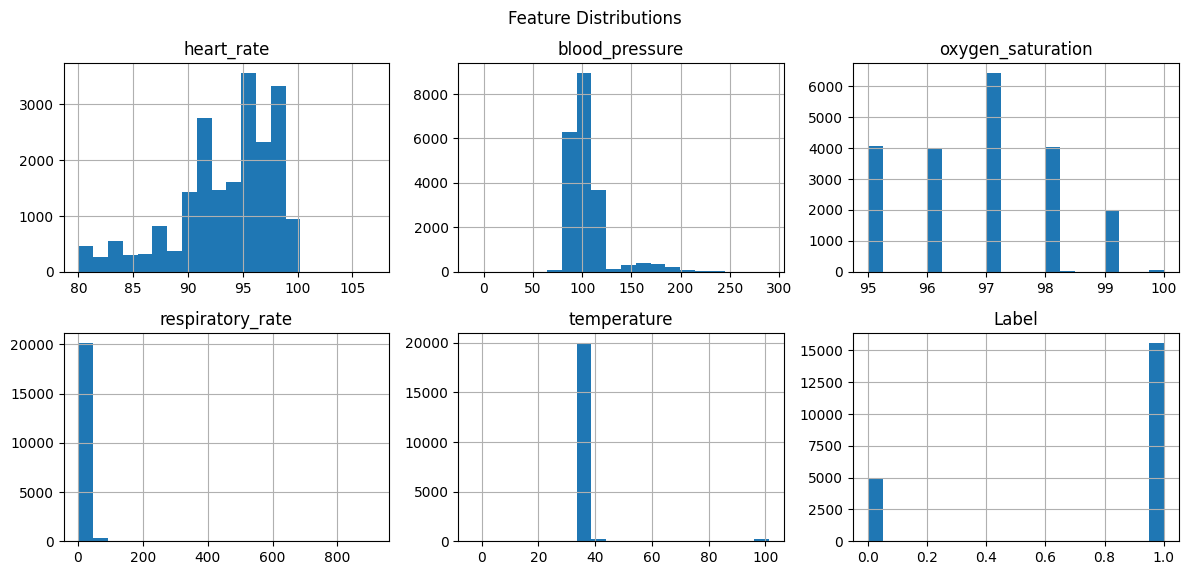

In [66]:
# Histograms for distributions
cvd_dataset.hist(bins=20, figsize=(12, 8), layout=(3, 3))
plt.tight_layout()
plt.suptitle("Feature Distributions", y=1.02)
plt.show()

### Violin Plot for the features

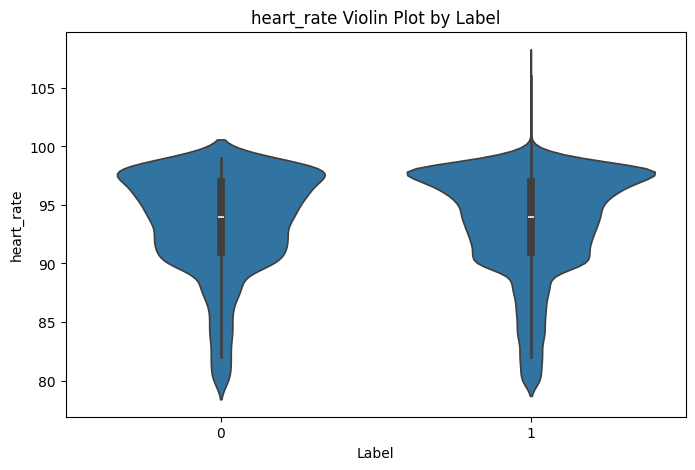

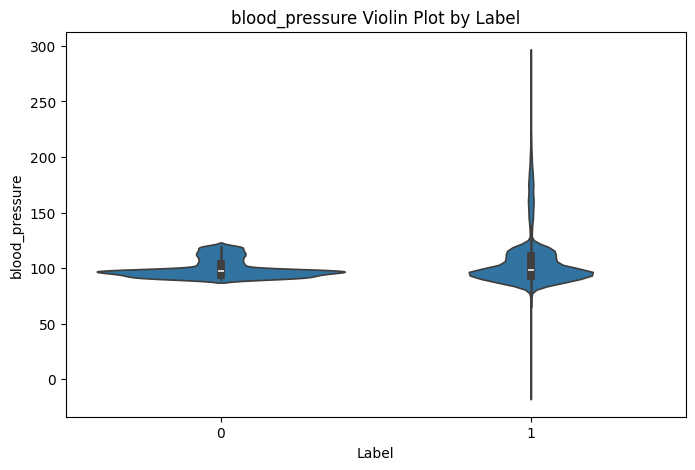

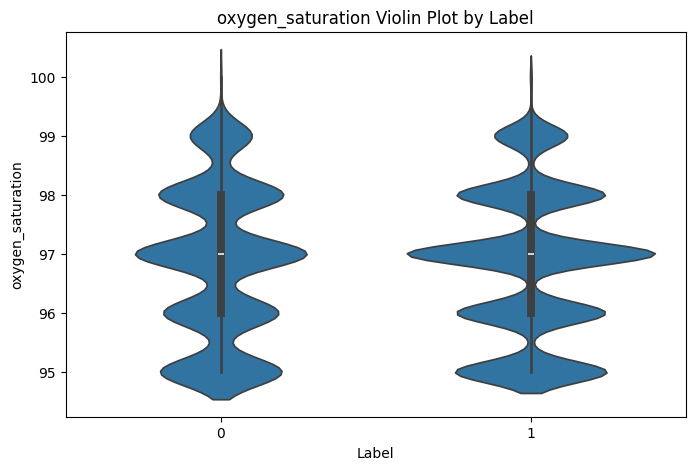

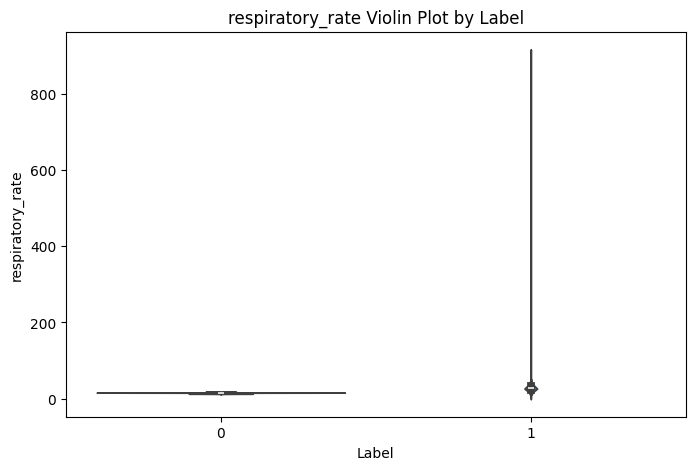

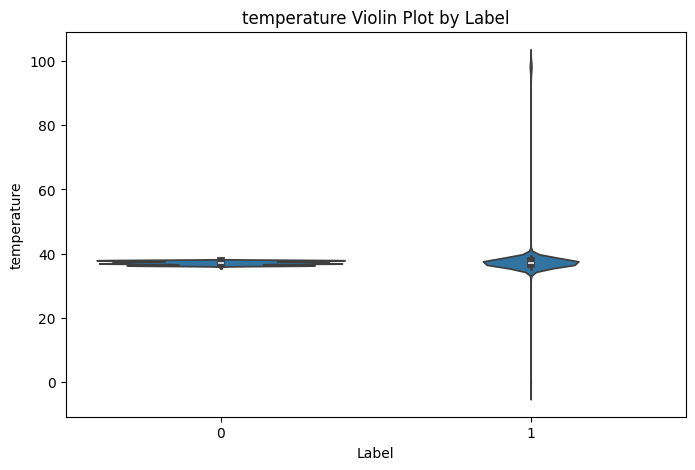

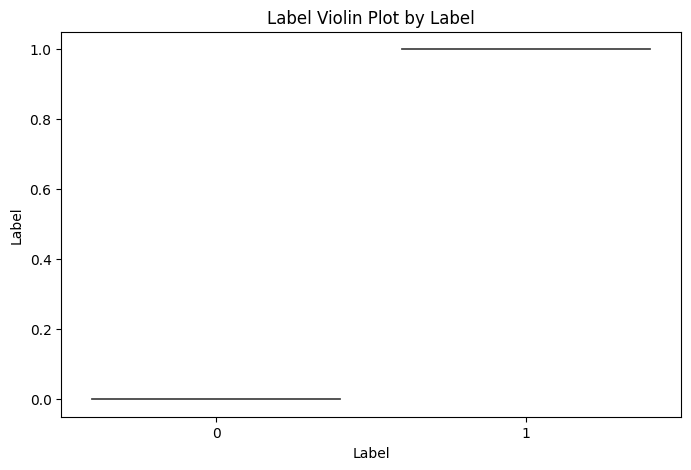

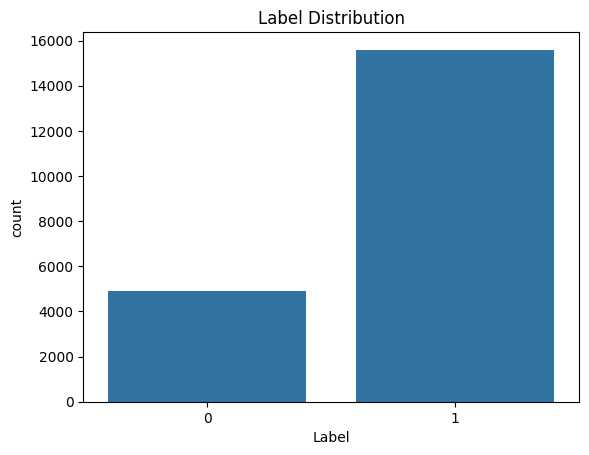

In [68]:
# Violin plots
for col in cvd_dataset.columns:
    plt.figure(figsize=(8, 5))
    sns.violinplot(x='Label', y=col, data=cvd_dataset, inner='box')
    plt.title(f'{col} Violin Plot by Label')
    plt.show()

# Countplot for class balance
sns.countplot(x='Label', data=cvd_dataset)
plt.title("Label Distribution")
plt.show()

##### These data are ready to feed into a ML model. As there aren't do much of pre-processing (no outliers, missing values)

In [69]:
# Saving the data to Analyzed file
cvd_dataset.to_csv("Datasets/Analyzed/Analyzed_CVD_Prediction.csv",index=False)